In [1]:
import numpy as np
import pandas as pd
import math
import itertools

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load and process the data

In [3]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
y = pd.Series(data=df['Passengers'].values, index=df['Month'])
y.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

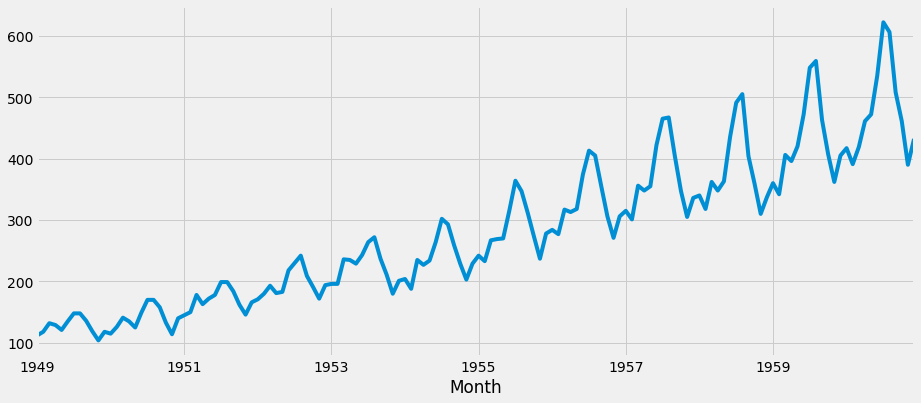

In [5]:
y.plot(figsize=(14, 6))
plt.show()

In [6]:
data = y.values.reshape(y.size,1)

# LSTM Forecast Model

### LSTM Data Preparation

In [7]:
'MixMaxScaler'
scaler = MinMaxScaler(feature_range=(0, 1))
data   = scaler.fit_transform(data)

In [8]:
train_size  = int(len(data) * 0.7)
test_size   = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print('train size :',train.shape[0])
print('test size  :',test.shape[0])

train size : 100
test size  : 44


In [9]:
'function to reshape data according to the number of lags'

def reshape_data (data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
    
    dataX = np.array(dataX)
    dataY = np.array(dataY)
    
    dataX = np.reshape(dataX,(dataX.shape[0],dataX.shape[1],1))
    return dataX, dataY

In [10]:
look_back = 1
trainX, trainY = reshape_data(train, look_back)
testX, testY = reshape_data(test, look_back)
print('train shape :',trainX.shape)
print('test shape  :',testX.shape)

train shape : (98, 1, 1)
test shape  : (42, 1, 1)


### Define and Fit  the Model

In [11]:
list_history = []
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(300):
    history = model.fit(trainX, trainY, epochs=1, batch_size=batch_size, validation_data=(testX, testY), verbose=2, shuffle=False)
    list_history.append(history)
    model.reset_states()

Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 1s - loss: 0.0053 - val_loss: 0.0242
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0089 - val_loss: 0.0217
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0063 - val_loss: 0.0187
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0049 - val_loss: 0.0175
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0042 - val_loss: 0.0170
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0039 - val_loss: 0.0169
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0037 - val_loss: 0.0168
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0036 - val_loss: 0.0168
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0035 - val_loss: 0.0167
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0035 - val_loss: 0.0167
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s 

Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0018 - val_loss: 0.0094
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0018 - val_loss: 0.0093
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0018 - val_loss: 0.0093
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0018 - val_loss: 0.0093
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0018 - val_loss: 0.0092
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0018 - val_loss: 0.0092
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0018 - val_loss: 0.0091
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0018 - val_loss: 0.0091
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0017 - val_loss: 0.0091
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0017 - val_loss: 0.0090
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s 

 - 0s - loss: 0.0016 - val_loss: 0.0081
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0081
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0081
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0081
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0081
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0081
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0080
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0080
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0080
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0080
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0080
Train on 98 samples,

Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s - loss: 0.0016 - val_loss: 0.0078
Train on 98 samples, validate on 42 samples
Epoch 1/1
 - 0s 

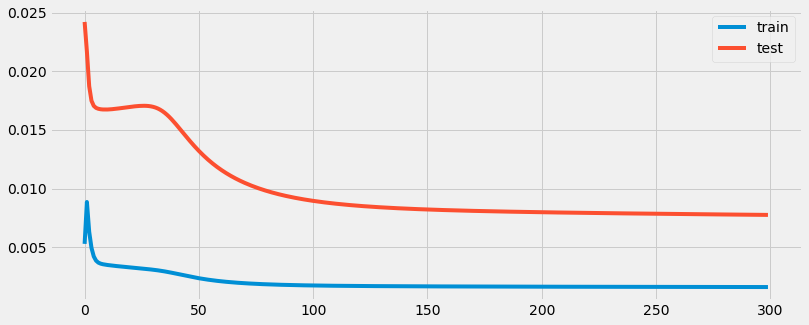

In [12]:
'plot history'
loss = []
val_loss = []
for history in list_history :
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
loss = np.asarray(loss)
val_loss = np.asarray(val_loss)

plt.figure(figsize=(12,5))
plt.plot(loss, label='train')
plt.plot(val_loss, label='test')
plt.legend()
plt.show()

In [13]:
'make predictions'
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [14]:
'invert predictions'
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
'calculate root mean squared error' 
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.55 RMSE
Test Score: 50.19 RMSE


In [16]:
'shift train predictions for plotting'
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

'shift test predictions for plotting'
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

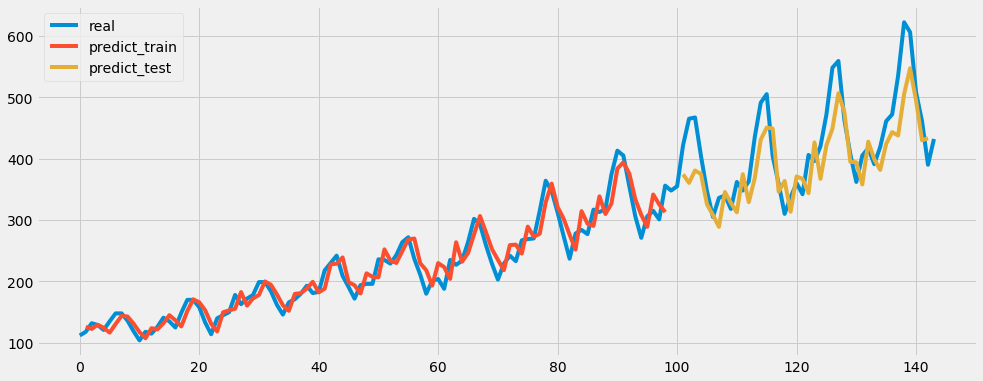

In [17]:
'plot baseline and predictions'
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(data),label = 'real')
plt.plot(trainPredictPlot,label = 'predict_train')
plt.plot(testPredictPlot,label = 'predict_test')
plt.legend()
plt.show()

In [18]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# SARIMA Model

In [ ]:
y_train = y[:'1957-04-02']
y_test  = y['1957-04-02':]

## Grid search the p, d, q parameters

In [ ]:
'Define the p, d and q parameters to take any value between 0 and 3'
p = d = q = range(0, 3)

'Generate all different combinations of p, q and q triplets'
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        mod = sm.tsa.statespace.SARIMAX(y_train,order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()
            
        print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

        if results.aic < best_result[2]:
            best_result = [param, param_seasonal, results.aic]
print('\nBest Result:', best_result)

## Plot model diagnostics

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(best_result[0][0], best_result[0][1], best_result[0][2]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
'make predictions'
pred = results.get_prediction(start=pd.to_datetime('1949-02-01'), dynamic=False,full_results=True)
pred_ci = pred.conf_int()

In [ ]:
ax = y_train.plot(label='Observed', figsize=(15, 6))
pred.predicted_mean.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [ ]:
pred_uc = results.get_forecast(steps=44)

In [ ]:
ax = y_train.plot(label='train', figsize=(15,6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
y_test.plot(ax=ax, label='test')
ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

In [ ]:
math.sqrt(mean_squared_error(y_test, pred_uc.predicted_mean))